In [16]:
import numpy as np

from hazma.field_theory_helper_functions.common_functions import minkowski_dot
from hazma.parameters import GF, qe, Vus
from hazma.parameters import charged_pion_mass as mpi
from hazma.parameters import neutral_kaon_mass as mk0
from hazma.parameters import muon_mass as mmu
from hazma.parameters import electron_mass as me
from hazma.gamma_ray import gamma_ray_rambo

from hazma import decay

In [2]:
def mat_elt_sqrd_k0_to_pi_l_nu(klist, ml=mmu):
    """
    Parameters
    ----------
    klist
        List of 4-momenta for the k0, pi, l and  nu respectively.
    """
    P = np.array([mk0, 0., 0., 0.])
    p = klist[0]
    q1 = klist[1]
    q2 = klist[2]

    q1DOTq2 = minkowski_dot(q1, q2)
    pDOTP = minkowski_dot(p, P)
    pDOTq1 = minkowski_dot(p, q1)
    pDOTq2 = minkowski_dot(p, q2)
    PDOTq1 = minkowski_dot(P, q1)
    PDOTq2 = minkowski_dot(P, q2)

    return (8.*GF**2*(2.*PDOTq1*pDOTq2 + 2.*PDOTq1*PDOTq2 +
                      2.*pDOTq1*(pDOTq2 + PDOTq2) - mk0**2*q1DOTq2 -
                      mpi**2*q1DOTq2 - 2.*pDOTP*q1DOTq2)*Vus**2)

In [3]:
def mat_elt_sqrd_k0_to_pi_l_nu_g(klist, ml=mmu):
    """
    Parameters
    ----------
    klist
        List of 4-momenta for the k0, pi, l, nu and g respectively.
    """
    P = np.array([mk0, 0., 0., 0.])
    p = klist[0]
    q1 = klist[1]
    q2 = klist[2]
    k = klist[3]

    kDOTp = minkowski_dot(k, p)
    q1DOTq2 = minkowski_dot(q1, q2)
    pDOTP = minkowski_dot(p, P)
    kDOTP = minkowski_dot(k, P)
    pDOTq1 = minkowski_dot(p, q1)
    pDOTq2 = minkowski_dot(p, q2)
    kDOTq1 = minkowski_dot(k, q1)
    kDOTq2 = minkowski_dot(k, q2)
    PDOTq1 = minkowski_dot(P, q1)
    PDOTq2 = minkowski_dot(P, q2)

    return (4.*qe**2*GF**2 *
            (-2.*kDOTp**3*(-kDOTq1 + ml**2) *
             (pDOTq2 + PDOTq2) + kDOTq1**2*mpi**2 *
             (-2.*kDOTq2*(pDOTq1 + PDOTq1) - 2.*pDOTq1*pDOTq2 -
              2.*PDOTq1*pDOTq2 - 2.*pDOTq1*PDOTq2 - 2.*PDOTq1*PDOTq2 -
              2.*kDOTq1*(kDOTq2 + pDOTq2 + PDOTq2) + 2.*kDOTP*q1DOTq2 +
              mk0**2*q1DOTq2 + mpi**2*q1DOTq2 + 2.*pDOTP*q1DOTq2) +
             kDOTp**2*(kDOTq2*(-kDOTq1 + ml**2)*(mk0**2 + mpi**2 + 2.*pDOTP) +
                       4.*kDOTq1**2*pDOTq2 - 2.*kDOTq1*ml**2*pDOTq2 +
                       4.*kDOTq1*pDOTq1*pDOTq2 - 2.*ml**2*pDOTq1*pDOTq2 +
                       2.*kDOTq1*PDOTq1*pDOTq2 - 2.*ml**2*PDOTq1*pDOTq2 +
                       2.*kDOTq1**2*PDOTq2 - 2.*kDOTq1*ml**2*PDOTq2 +
                       4.*kDOTq1*pDOTq1*PDOTq2 - 2.*ml**2*pDOTq1*PDOTq2 +
                       2.*kDOTq1*PDOTq1*PDOTq2 - 2.*ml**2*PDOTq1*PDOTq2 -
                       2.*kDOTP*(-kDOTq1 + ml**2)*(pDOTq2 + PDOTq2) -
                       kDOTq1*mk0**2*q1DOTq2 + mk0**2*ml**2*q1DOTq2 -
                       kDOTq1*mpi**2*q1DOTq2 + ml**2*mpi**2*q1DOTq2 -
                       2.*kDOTq1*pDOTP*q1DOTq2 + 2.*ml**2*pDOTP*q1DOTq2 -
                       2.*kDOTq1*pDOTq1*q1DOTq2) +
             kDOTp*kDOTq1 *
             (2.*kDOTq1**2*pDOTq2 + pDOTq1 *
              (-(kDOTq2*(mk0**2 + mpi**2 + 2.*pDOTP - 2.*pDOTq1 - 2.*PDOTq1)) +
               2.*(2.*PDOTq1*pDOTq2 + 2.*PDOTq1*PDOTq2 +
                   2.*pDOTq1*(pDOTq2 + PDOTq2) +
                   kDOTP*(pDOTq2 + PDOTq2 - q1DOTq2) - mk0**2*q1DOTq2 -
                   mpi**2*q1DOTq2 - 2.*pDOTP*q1DOTq2)) +
              kDOTq1*(-2.*kDOTq2*(mpi**2 + pDOTP - pDOTq1) +
                      (2.*kDOTP + mk0**2 - mpi**2 + 6.*pDOTq1 +
                       2.*PDOTq1)*pDOTq2 -
                      2.*((mpi**2 + pDOTP - 2.*pDOTq1)*PDOTq2 +
                          pDOTP*q1DOTq2))))*Vus**2) / \
        (kDOTp**2*kDOTq1**2)

In [20]:
e_gams_mu, dN_dEs_mu = gamma_ray_rambo([mk0], [mpi, mmu, 0., 0.], mk0,
                                 mat_elt_sqrd_k0_to_pi_l_nu,
                                 mat_elt_sqrd_k0_to_pi_l_nu_g,
                                 num_ps_pts=100000,
                                 num_bins=100)

In [23]:
e_gams_e, dN_dEs_e = gamma_ray_rambo([mk0], [mpi, me, 0., 0.], mk0,
                                 lambda kl: mat_elt_sqrd_k0_to_pi_l_nu(kl, me),
                                 lambda kl: mat_elt_sqrd_k0_to_pi_l_nu_g(kl, me),
                                 num_ps_pts=1000000,
                                 num_bins=100)

In [21]:
dN_dEs_benchmark = decay.long_kaon(e_gams_mu, 1.01 * mk0)

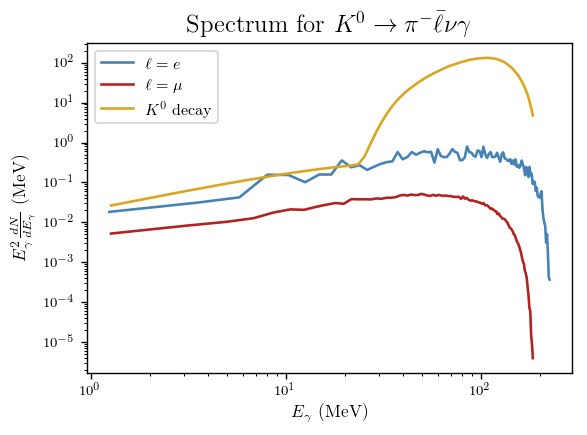

In [24]:
plt.loglog(e_gams_e, e_gams_e**2 * dN_dEs_e, label=r"$\ell=e$")
plt.loglog(e_gams_mu, e_gams_mu**2 * dN_dEs_mu, label=r"$\ell=\mu$")
plt.loglog(e_gams_mu, e_gams_mu**2 * dN_dEs_benchmark, label=r"$K^0$ decay")

plt.title(r"Spectrum for $K^0 \to \pi^- \bar{\ell} \nu \gamma$")
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$E_\gamma^2 \frac{dN}{dE_\gamma}$ (MeV)")
plt.legend()

In [25]:
print("Average photon energy (l=e): %f MeV" % np.sum(e_gams_e[1:] * dN_dEs_e[1:] * (e_gams_e[1:] - e_gams_e[:-1])))
print("Average photon energy (l=mu): %f MeV" % np.sum(e_gams_mu[1:] * dN_dEs_mu[1:] * (e_gams_mu[1:] - e_gams_mu[:-1])))

Average photon energy (l=e): 1.141990 MeV
Average photon energy (l=mu): 0.109607 MeV
